# Extract images from a video and add them to a dataset

Here we want to get some images that will be used to create our dataset of labelled images.

In this notebook, we extract some images from a video and label these images.

You probably want to have at least 300-500 images in your dataset to build a reliable model. You can start with 150-200 images and go through all Notebooks. You can always add more images and re-train your network later.

Get a minimum of 150 images to get started.

In [1]:
!pip install albumentations==1.3.0
!git clone https://github.com/kevin-allen/unetTracker
!pip install -r unetTracker/requirements.txt
!pip install -e unetTracker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.3.1
    Uninstalling albumentations-1.3.1:
      Successfully uninstalled albumentations-1.3.1
Cloning into 'unetTracker'...
remote: Enumerating objects: 965, done.
remote: Counting objects: 100% (344/344), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 965 (delta 207), reused 327 (delta 196), pack-reused 621
Receiving objects: 100% (965/965), 124.39 MiB | 32.95 MiB/s, done.
Resolving deltas: 100% (597/597), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.0/380.0 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 7.8

Obtaining file:///content/unetTracker
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for unetTracker (pyproject.toml) ... done
  Created wheel for unetTracker: filename=unetTracker-0.0.1-0.editable-py3-none-any.whl size=16048 sha256=4a6f3683dac4d5b8f44f74e3d3b417c44aa808beb923f454408c67bc9c9925c1
  Stored in directory: /tmp/pip-ephem-wheel-cache-373ru704/wheels/62/9b/5a/0cb547490a9187d698861d98e1e803c5e64f31a9d899a8e84c
Successfully built unetTracker


In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

fn = "/content/drive/My Drive/dsfolder"
if os.path.exists(fn):
  print("We can access the dsfolder directory.")
else:
  raise IOError("Problem accessing the dsfolder directory.")

Mounted at /content/drive
We can access the dsfolder directory.


In [2]:
# this will run the code in the setup_project.py and create a variable called `project`
fn = "/content/drive/My Drive/dsfolder/setup_project.py"
if os.path.exists(fn):
  print("We can access the file.")
else:
  raise IOError("Problem accessing the file.")

%run "/content/drive/My Drive/dsfolder/setup_project.py"

We can access the file.
Project directory: /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker
Getting configuration from config file. Values from config file will be used.
Loading /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/config.yalm
{'augmentation_HorizontalFlipProb': 0.5, 'augmentation_RandomBrightnessContrastProb': 0.2, 'augmentation_RandomSizedCropProb': 1.0, 'augmentation_RotateProb': 0.3, 'image_extension': '.png', 'image_size': [270, 480], 'labeling_ImageEnlargeFactor': 2.0, 'name': 'finger_tracker', 'normalization_values': {'means': [0.40666553378105164, 0.45300230383872986, 0.5148566961288452], 'stds': [0.23905879259109497, 0.2506697177886963, 0.2679229974746704]}, 'object_colors': [(0.0, 0.0, 255.0), (255.0, 0.0, 0.0), (255.0, 255.0, 0.0), (240.0, 255.0, 255.0)], 'objects': ['f1', 'f2', 'f3', 'f4'], 'target_radius': 6, 'unet_features': [64, 128, 256, 512]}


In [3]:
%matplotlib widget

import glob
from unetTracker.dataset import UNetDataset
from unetTracker.camera import USBCamera, bgr8_to_jpeg
from unetTracker.unetGUI import LabelFromImagesGUI

## Inspect your project object

Make sure you have the configuration for your project.

In [4]:
project.configDict

{'augmentation_HorizontalFlipProb': 0.5,
 'augmentation_RandomBrightnessContrastProb': 0.2,
 'augmentation_RandomSizedCropProb': 1.0,
 'augmentation_RotateProb': 0.3,
 'image_extension': '.png',
 'image_size': [270, 480],
 'labeling_ImageEnlargeFactor': 2.0,
 'name': 'finger_tracker',
 'normalization_values': {'means': [0.40666553378105164,
   0.45300230383872986,
   0.5148566961288452],
  'stds': [0.23905879259109497, 0.2506697177886963, 0.2679229974746704]},
 'object_colors': [(0.0, 0.0, 255.0),
  (255.0, 0.0, 0.0),
  (255.0, 255.0, 0.0),
  (240.0, 255.0, 255.0)],
 'objects': ['f1', 'f2', 'f3', 'f4'],
 'target_radius': 6,
 'unet_features': [64, 128, 256, 512]}

## Create a dataset to store labeled images

Create a dataset for the project.

In [5]:
dataset = UNetDataset(image_dir=project.image_dir, mask_dir=project.mask_dir, coordinate_dir=project.coordinate_dir,
                      image_extension=project.image_extension)

In [6]:
print("Number of images in the dataset:",len(dataset))

Number of images in the dataset: 178


## Extract frames from a video to populate our dataset

You will need to copy your video file to the `videos` directory located inside your project directory.

You need to adjust the video_fn below so that it matches your file. In this example, I put the `human_hand.mp4` video in a folder `videos` located in the project directory.

In [7]:
video_fn = '/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/videos/human_hand.mp4'

In [8]:
if os.path.exists(video_fn):
    print("Video file {} exist".format(video_fn))
else:
    raise IOError("Video file {} does not exist".format(video_fn))

Video file /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/videos/human_hand.mp4 exist


You need to select a directory in which the individual extracted frames will be saved. Here I used a directory within my project directory.

In [9]:
extracted_frame_dir = project.project_dir+"/extracted_frames/" # directory where the extracted images will be saved

And we need to give a file name in which we will store information about the extracted images (from which video were they extracted, etc.).

In [10]:
frame_info_file = extracted_frame_dir+"frame_info.csv" # file where the source of the image is stored

We can now extract images that we will have to label. These images will be used to train our model.

You will probably want to use at least 150 images. But you can start with a small number and then rerun this function later on.

In [11]:
dataset.extract_frames_from_video(video_fn = video_fn,
                                  number_frames = 10, # how many images to extract
                                  frame_dir = extracted_frame_dir,
                                  frame_info_file = frame_info_file,
                                  image_size = project.image_size)

video length: 5795, image size: 270h 480w
Extracting frames: [ 545 2370 2582 2709 2916 3086 3536 3544 4775 5463] to /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/
Saving image info to /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/frame_info.csv


See the image files that were created bye the `extract_frame_from_video()` function.

In [12]:
image_file_list = glob.glob(extracted_frame_dir+"*")
print("Number of files:", len(image_file_list))
image_file_list

Number of files: 11


['/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/frame_info.csv',
 '/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/049d7cee-927f-11ee-8002-0242ac1c000c.png',
 '/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/04b063b8-927f-11ee-8002-0242ac1c000c.png',
 '/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/04bcce0a-927f-11ee-8002-0242ac1c000c.png',
 '/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/04d53454-927f-11ee-8002-0242ac1c000c.png',
 '/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/04ebcc78-927f-11ee-8002-0242ac1c000c.png',
 '/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/04f8ed36-927f-11ee-8002-0242ac1c000c.png',
 '/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/050161b4-927f-11ee-8002-0242ac1c000c.png',
 '/content

## Label extracted frames and save to dataset

We use a GUI to label the object in the extracted frames.

Make sure that your image is shown at maximal size by extending the notebook window.
Make sure the label are correctly positioned in the image below.


1. In the large image, click on the object selected by the radio button. The label should appear in the picture below.
2. If you don't want to save the data from a particular image, click on `Next frame`.
2. Repeat for all your visible objects
3. Click on `Save labeled frame`
4. Repeat for all your images

When you click on `Save labeled frame`, the image is removed from the `extract_frame_dir` directory and transferred to your dataset.

In [13]:
extracted_frame_dir = project.project_dir+"/extracted_frames/" # directory where the extracted images will be saved
frame_info_file = extracted_frame_dir+"frame_info.csv" # file where the source of the image is stored

In [14]:
from google.colab import output
output.enable_custom_widget_manager()

In [15]:
LabelFromImagesGUI(image_dir=extracted_frame_dir,
                   frame_info_file=frame_info_file,
                   project=project,dataset=dataset)

frame.shape: (270, 480, 3)
049d7cee-927f-11ee-8002-0242ac1c000c.png


LabelFromImagesGUI(children=(HTML(value='Event info'), HBox(children=(Label(value='Objects:'), RadioButtons(la…

In [17]:
len(dataset)

185

## Data stored in the dataset.

Once you have saved labelled images to the dataset, you can use the dataset object to retrieved them.

In [18]:
image, label, coord = dataset[0]

In [19]:
image.shape

torch.Size([3, 270, 480])

In [20]:
image.min(),image.max()

(tensor(0.), tensor(255.))

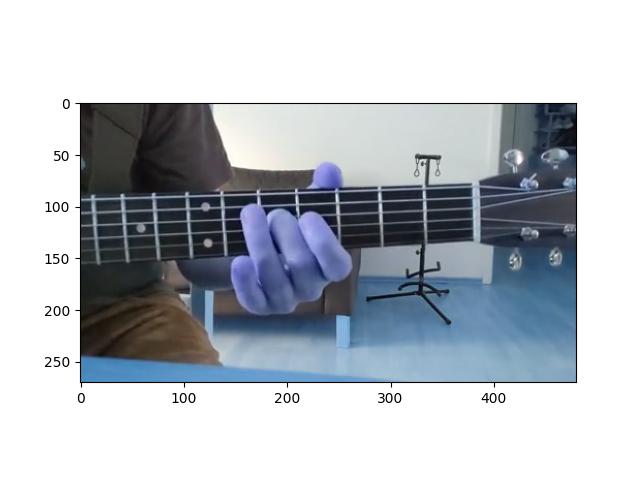

In [23]:
plt.imshow(image.permute(1,2,0).numpy().astype("int"))
plt.show()

In [22]:
label.shape,label.dtype

(torch.Size([4, 270, 480]), torch.float32)

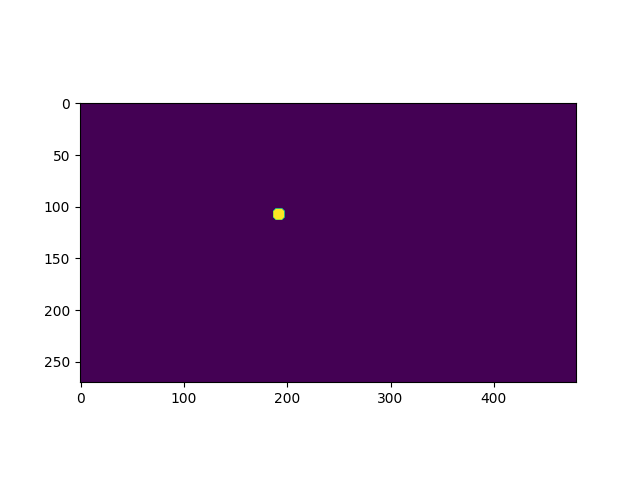

In [ ]:
plt.imshow(label.permute(1,2,0).numpy().astype(int)[:,:,1])
plt.show()

In [ ]:
coord

array([[223., 105.],
       [192., 107.],
       [169., 107.],
       [156., 162.]])